# 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # para conseguir ver todas as colunas

In [2]:
df = pd.read_csv('dados/CarPrice_Assignment.csv')

# 2. Data Wrangling

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 2.1 Remover colunas
Colunas não relevantes para o projeto como car_ID e CarName

In [5]:
df = df.drop(columns=['car_ID', 'CarName'])

<Axes: >

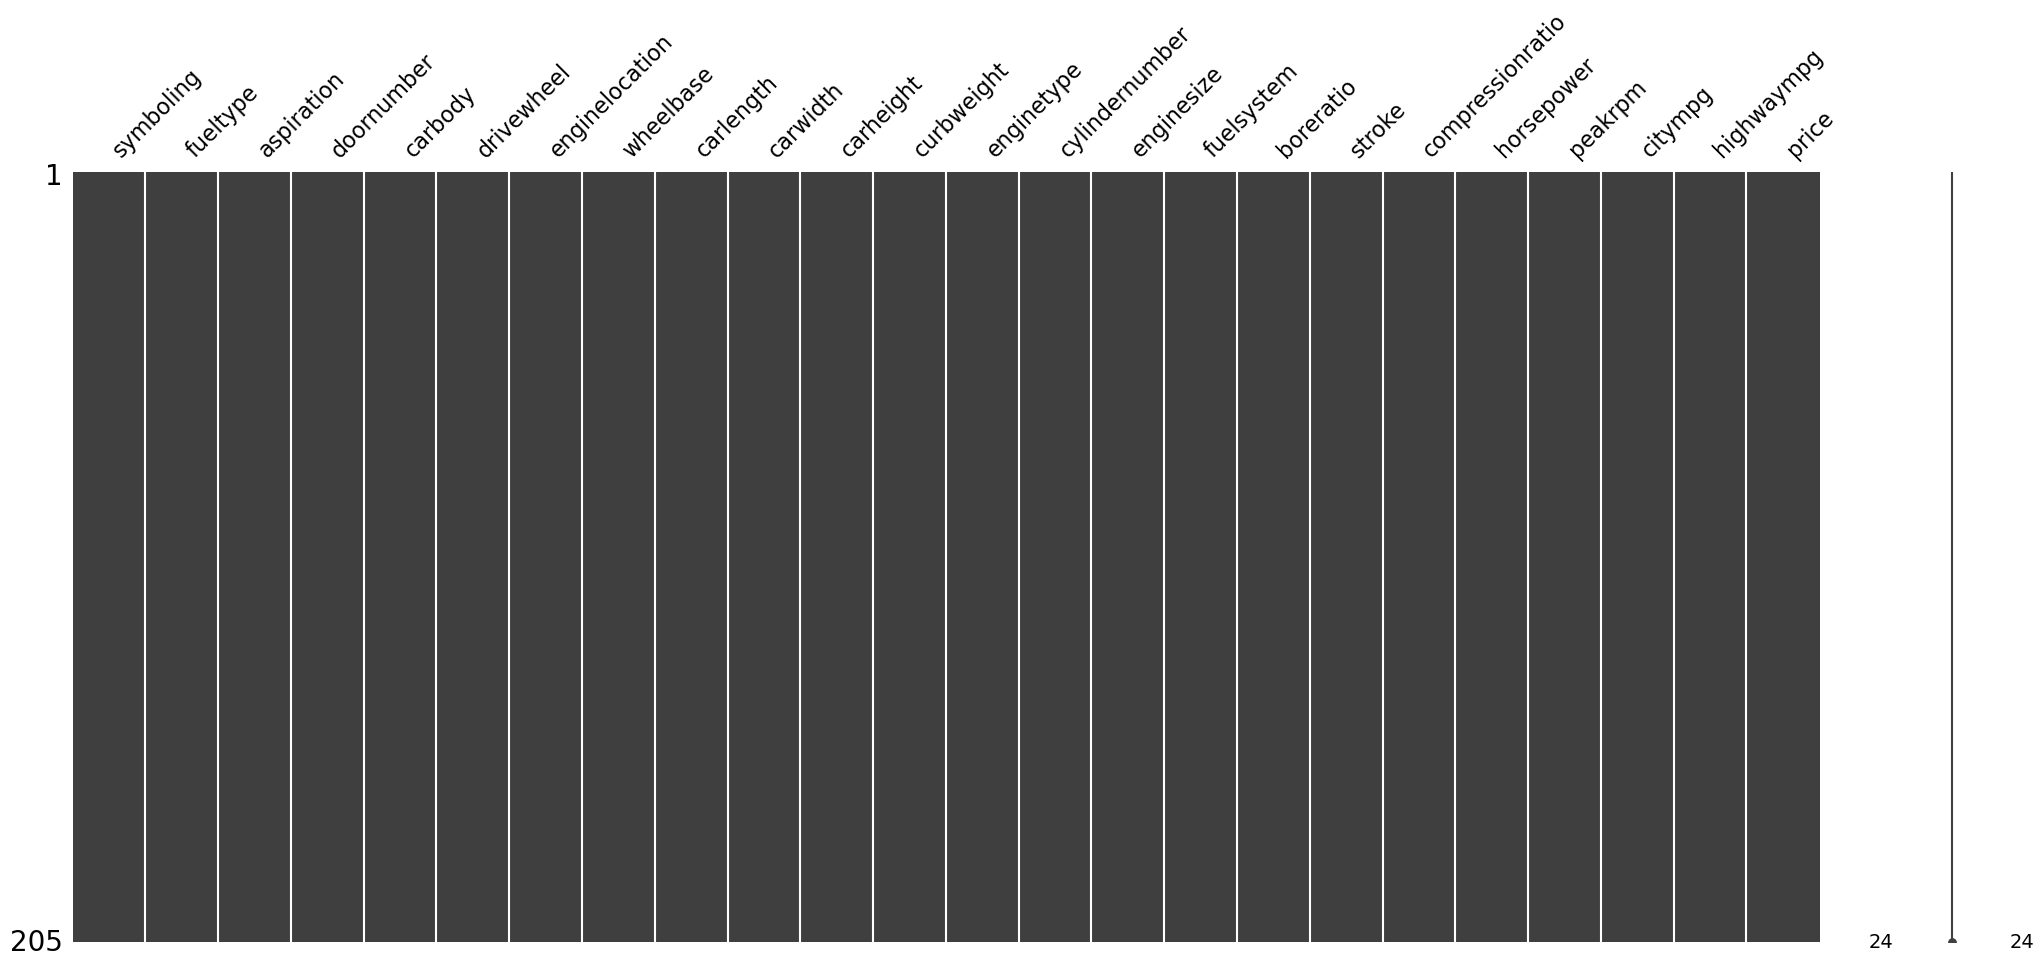

In [6]:
# Plotar o gráfico de matriz de dados ausentes
msno.matrix(df)

### Não temos valores ausentes para esse dataset

## 2.2 Tratando varivavel symboling
tratamento necessário para remover valores negativos

In [7]:
# Mapear os valores antigos para os novos valores
symboling_mapping = {3: 0, 1: 1, 2: 2, 0: 3, -1: 4, -2: 5}

# Aplicar o mapeamento à coluna 'symboling'
df['symboling'] = df['symboling'].map(symboling_mapping)
df['symboling'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## 2.2 Tratando colunas categoricas
Converter colunas categóricas em variáveis dummy usando one-hot encoding

In [8]:
# Converter colunas categóricas em variáveis dummy usando one-hot encoding
categorical_columns = ['fueltype', 
                       'aspiration', 
                       'doornumber', 
                       'carbody', 
                       'drivewheel', 
                       'enginelocation', 
                       'enginetype', 
                       'cylindernumber', 
                       'fuelsystem']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,4,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,4,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,4,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# 3. EDA

In [9]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## 3.1 Estatística descritiva

In [10]:
df.describe().round(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.0,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.0,205.00,205.00,205.00,205.00
mean,2.06,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71,0.9,0.18,0.44,0.04,0.34,0.47,0.12,0.59,0.37,0.01,0.00,0.06,0.72,0.07,0.06,0.02,0.05,0.78,0.12,0.00,0.00,0.02,0.32,0.01,0.1,0.00,0.46,0.04,0.00
std,1.30,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85,0.3,0.39,0.50,0.19,0.48,0.50,0.33,0.49,0.48,0.12,0.07,0.24,0.45,0.26,0.24,0.14,0.23,0.42,0.32,0.07,0.07,0.14,0.47,0.12,0.3,0.07,0.50,0.21,0.07
min,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,1.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
50%,2.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
75%,3.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00,1.0,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,1.00,0.00,0.00
max,5.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00


## 3.2 Comportamento da variavel dependente ('price')

In [11]:
# configuração de grafico

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

### 3.2.1 Plotando a distribuição do preço

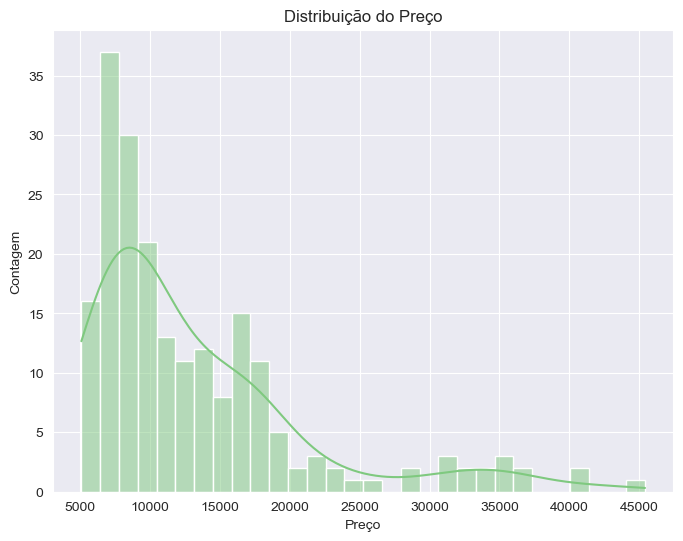

In [12]:

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição do Preço')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

### 3.2.2 Verificando a relação do preço com outras variáveis usando um gráfico de dispersão

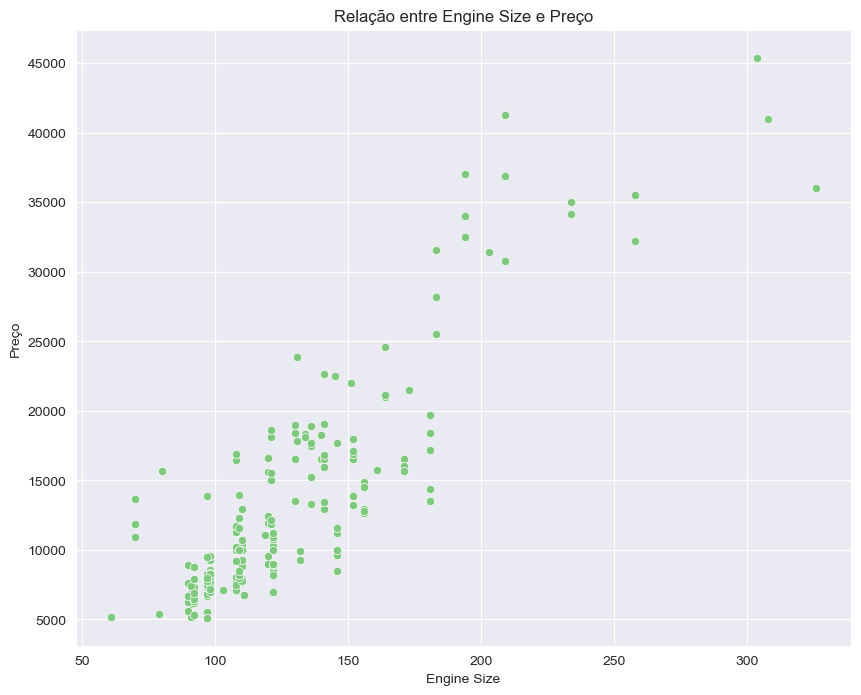

In [13]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title('Relação entre Engine Size e Preço')
plt.xlabel('Engine Size')
plt.ylabel('Preço')
plt.show()

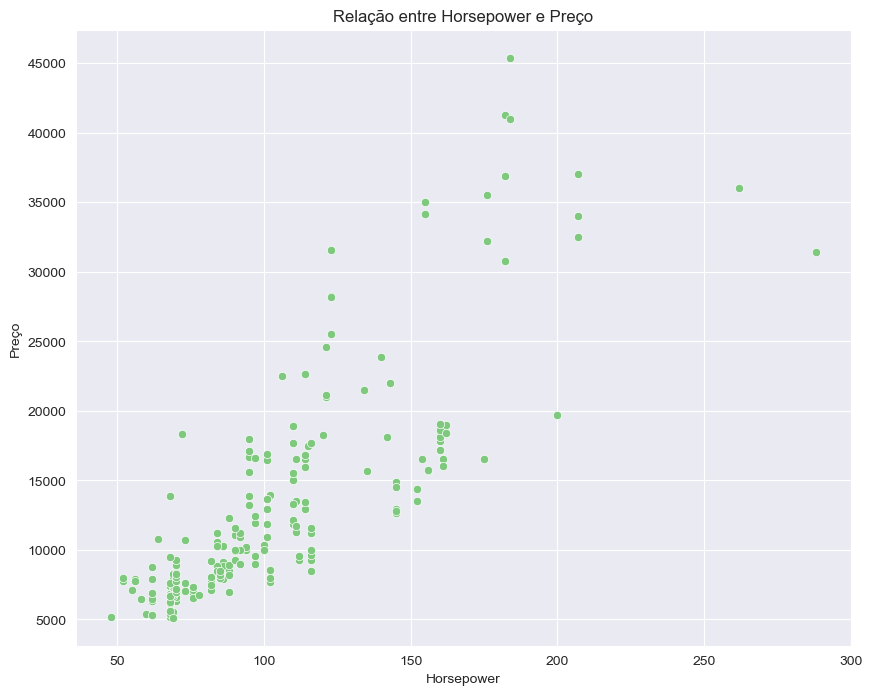

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Relação entre Horsepower e Preço')
plt.xlabel('Horsepower')
plt.ylabel('Preço')
plt.show()

### 3.3.3 Verificando a correlação entre as variáveis numéricas

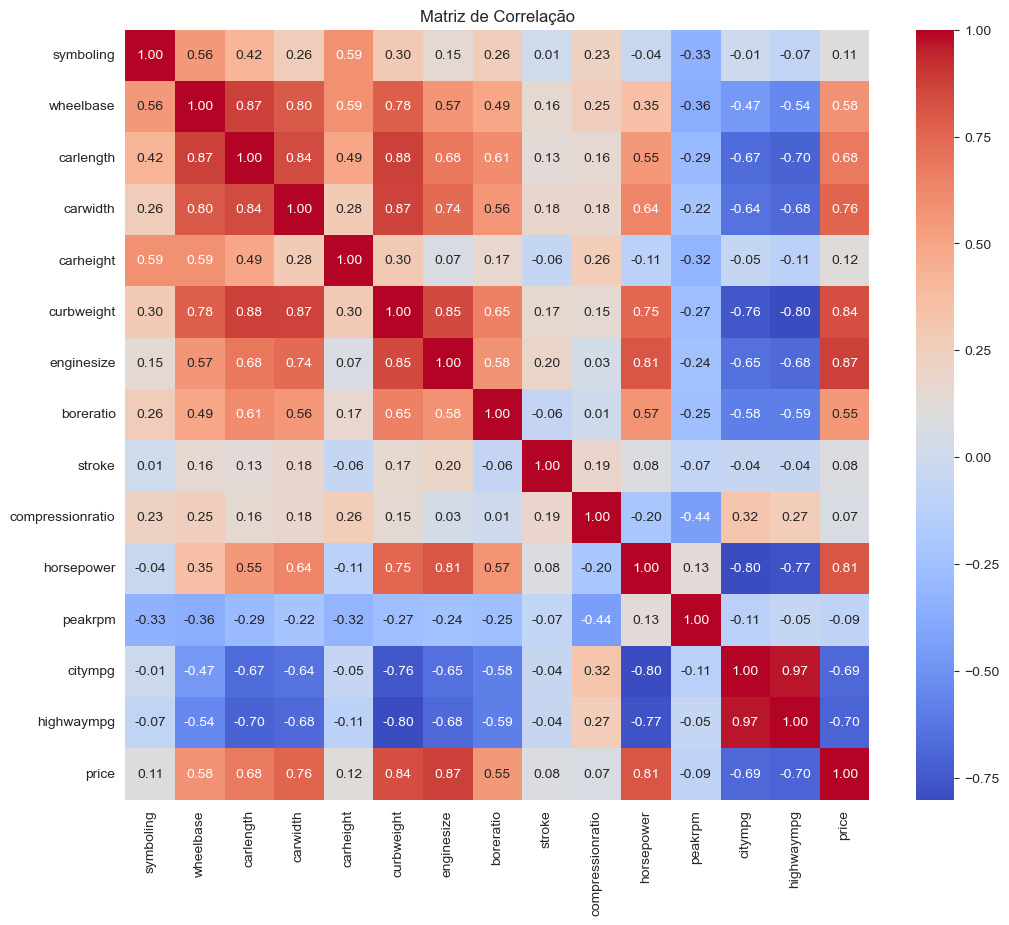

In [15]:
# Verificando a correlação entre as variáveis numéricas

dados_categoricos = [
    "fueltype_gas",
    "aspiration_turbo",
    "doornumber_two",
    "carbody_hardtop",
    "carbody_hatchback",
    "carbody_sedan",
    "carbody_wagon",
    "drivewheel_fwd",
    "drivewheel_rwd",
    "enginelocation_rear",
    "enginetype_dohcv",
    "enginetype_l",
    "enginetype_ohc",
    "enginetype_ohcf",
    "enginetype_ohcv",
    "enginetype_rotor",
    "cylindernumber_five",
    "cylindernumber_four",
    "cylindernumber_six",
    "cylindernumber_three",
    "cylindernumber_twelve",
    "cylindernumber_two",
    "fuelsystem_2bbl",
    "fuelsystem_4bbl",
    "fuelsystem_idi",
    "fuelsystem_mfi",
    "fuelsystem_mpfi",
    "fuelsystem_spdi",
    "fuelsystem_spfi"
]


correlation_matrix = df.drop(columns=dados_categoricos).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### 3.3.2 Identificando possíveis outliers usando um box plot

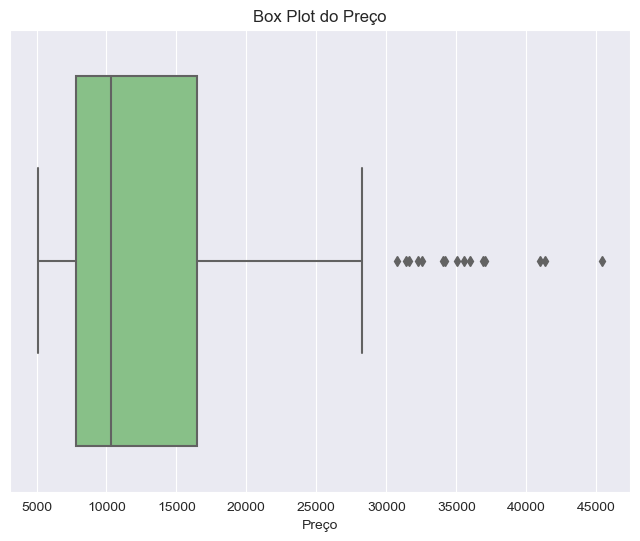

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot do Preço')
plt.xlabel('Preço')
plt.show()

### 3.3.4 Outliers

In [17]:
# Calcular os limites inferior e superior do boxplot
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar as linhas que são outliers
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]

# Exibir as linhas que são outliers
outliers

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,3,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,5400,16,22,30760.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
16,3,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182,5400,16,22,41315.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
17,3,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182,5400,15,20,36880.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
47,3,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,32250.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
48,3,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,35550.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
49,3,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17,36000.0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
70,4,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25,31600.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
71,4,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155,4750,16,18,34184.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
72,0,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155,4750,16,18,35056.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
73,3,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184,4500,14,16,40960.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**REMOVENDO OS OUTLIERS DO DATASET**

In [18]:
df = df.drop(outliers.index)

In [19]:
df.corr().round(2).loc['price']

symboling                0.20
wheelbase                0.67
carlength                0.73
carwidth                 0.79
carheight                0.25
curbweight               0.85
enginesize               0.75
boreratio                0.50
stroke                   0.08
compressionratio         0.19
horsepower               0.73
peakrpm                 -0.14
citympg                 -0.67
highwaympg              -0.69
price                    1.00
fueltype_gas            -0.24
aspiration_turbo         0.43
doornumber_two          -0.14
carbody_hardtop          0.05
carbody_hatchback       -0.22
carbody_sedan            0.12
carbody_wagon            0.07
drivewheel_fwd          -0.60
drivewheel_rwd           0.63
enginelocation_rear       NaN
enginetype_dohcv          NaN
enginetype_l             0.16
enginetype_ohc          -0.21
enginetype_ohcf         -0.16
enginetype_ohcv          0.23
enginetype_rotor         0.04
cylindernumber_five      0.43
cylindernumber_four     -0.56
cylindernu

Um valor de correlação próximo de -1 indica uma forte correlação negativa, ou seja, quando uma variável aumenta, a outra diminui na mesma proporção.
Um valor de correlação próximo de 0 indica que não há uma relação linear forte entre as variáveis.


1. Variáveis com forte correlação positiva com o preço:
* curbweight: 0.85
* enginesize: 0.75
* carwidth: 0.79
* carlength: 0.73
* horsepower: 0.73
Isso sugere que, à medida que essas variáveis aumentam, o preço dos carros também tende a aumentar.

2. Variáveis com forte correlação negativa com o preço:
* highwaympg: -0.69
* citympg: -0.67
* drivewheel_fwd: -0.60
* cylindernumber_four: -0.56
Essas variáveis têm uma correlação negativa com o preço, o que indica que, à medida que elas aumentam, o preço dos carros tende a diminuir.

3. Algumas outras correlações interessantes:
* aspiration_turbo: 0.43 (carros com aspiração turbo tendem a ter preços mais altos)
* fueltype_gas: -0.24 (carros a gasolina têm preços mais baixos em comparação com carros a diesel)

# 4. Selecionando features

## 4.1 PreProcessamento

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
y = df['price']
X = df.drop(columns=['price'])

In [22]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 190, dtype: float64

In [23]:
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### 4.1.3 Calculando o logaritmo para as variaveis y

In [24]:
X_log = X.copy()
for column_name in X_log.columns:
    column = X_log[column_name]
    if ((column == 0).sum()) >0:
        X_log[column_name] = np.log(X_log[column_name]+1)
    else:
        X_log[column_name] = np.log(X_log[column_name])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy


In [27]:
# Converter X e y para arrays NumPy
X = X_train.values
y = y_train.values

In [28]:
# Inicializar o modelo de regressão que será usado pelo Boruta
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
# Inicializar o objeto Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

In [30]:
# Ajustar o Boruta ao conjunto de dados
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	33
I

BorutaPy(estimator=RandomForestRegressor(n_estimators=42,
                                         random_state=RandomState(MT19937) at 0x2452A45FB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2452A45FB40, verbose=2)

In [31]:
# Exibir as características selecionadas como importantes
selected_features = X_train.columns[boruta_selector.support_]
#selected_features = X_train.columns
print("Features selecionadas:")
print(selected_features)

Features selecionadas:
Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'highwaympg'],
      dtype='object')


In [32]:
X_train[selected_features]

,wheelbase,carwidth,curbweight,enginesize,horsepower,highwaympg
154,95.7,63.6,2290,92,62,32
10,101.2,64.8,2395,108,101,29
160,95.7,64.4,2094,98,70,47
190,94.5,64.0,2221,109,90,29
101,100.4,66.5,3095,181,152,22
...,...,...,...,...,...,...
94,94.5,63.8,1951,97,69,37
151,95.7,63.6,2040,92,62,38
148,96.9,65.4,2420,108,82,29
116,107.9,68.4,3252,152,95,33


# 5. Regressão Linear Multipla

In [33]:
X_train_com_constante = sm.add_constant(X_train)
# Como o y_train esta na matriz 2d eu converto para 1d com y_train.values.ravel()

modelo_statsmodels = sm.OLS(y_train.values.ravel(), X_train_com_constante, hasconst=True).fit()

In [34]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     30.39
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.58e-41
Time:                        17:03:39   Log-Likelihood:                -1246.0
No. Observations:                 142   AIC:                             2564.
Df Residuals:                     106   BIC:                             2670.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.377e+

<br>
<p>o fato de variáveis como <b>carlength e fuelsystem entre outras</b> terem sido eliminadas do modelo por terem o P <|t| não significa que elas não são relevantes para descrever a variação dos preços. Siginifica que, na combinação com as outras variáveis disponíveis par chegar em uma melhor previsão, é melhor trabalhar sem elas.</p>

In [35]:
corte_p = 0.5
# Filtrar as colunas com P>|t| menor que o valor de corte
colunas_significativas = modelo_statsmodels.pvalues[modelo_statsmodels.pvalues < corte_p].index

In [36]:
colunas_significativas[1:]

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [37]:
modelo = LinearRegression()
modelo.fit(X_train[colunas_significativas[1:]], y_train)

LinearRegression()

In [38]:
modelo.score(X_train_com_constante[colunas_significativas[1:]], y_train)

0.9054211690132957

# 6. Metricas do Modelo de Regressão Linear Multipla

## 6.1 Erro Médio Absoluto (Mean Absolute Error - MAE):
O MAE calcula a média das diferenças absolutas entre as previsões do modelo e os valores verdadeiros. Ele mede a magnitude média do erro sem considerar a direção (positivo ou negativo) do erro.


In [39]:
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo das diferenças absolutas entre previsões e valores verdadeiros
diferencas_absolutas = [abs(previsao - verdadeiro) for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo do MAE (Erro Médio Absoluto)
mae = sum(diferencas_absolutas) / len(diferencas_absolutas)

print("MAE:", mae)


MAE: 1526.8106200979873


## 6.2 Erro Quadrático Médio (Mean Squared Error - MSE):
O MSE calcula a média dos quadrados das diferenças entre as previsões do modelo e os valores verdadeiros. É uma métrica mais sensível a erros maiores, pois os erros são elevados ao quadrado.


In [40]:
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Eleva as diferenças ao quadrado
quadrados_diferencas = [dif ** 2 for dif in diferencas]

# Cálculo do MSE (Erro Quadrático Médio)
mse = sum(quadrados_diferencas) / len(quadrados_diferencas)

print("MSE:", mse)


MSE: 3732181.720588843


## 6.3 Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE):
O RMSE é a raiz quadrada do MSE e é frequentemente usado para fornecer uma métrica de erro na mesma unidade da variável dependente. É uma métrica útil para comparar diretamente com os valores originais do conjunto de dados.

In [41]:
import math

previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Eleva as diferenças ao quadrado
quadrados_diferencas = [dif ** 2 for dif in diferencas]

# Cálculo do MSE (Erro Quadrático Médio)
mse = sum(quadrados_diferencas) / len(quadrados_diferencas)

# Cálculo do RMSE (Raiz do Erro Quadrático Médio)
rmse = math.sqrt(mse)

print("RMSE:", rmse)


RMSE: 1931.8855350638253


## 6.4 Coeficiente de Determinação (R²):
O R² mede a proporção da variabilidade da variável dependente que é explicada pelo modelo. Ele varia de 0 a 1, sendo 1 indicativo de um modelo perfeito que explica toda a variabilidade dos dados.


In [42]:
from sklearn.metrics import r2_score

# Suponha que você tenha as previsões e os valores verdadeiros armazenados em listas
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo do R² (Coeficiente de Determinação)
r2 = r2_score(valores_verdadeiros, previsoes)

print("R²:", r2)

R²: 0.7825168468499135


## 6.5 O R-quadrado ajustado (Adjusted R-squared) 
Métrica relacionada ao R-quadrado (R²) que leva em consideração o número de variáveis independentes no modelo. O R² mede a proporção da variabilidade da variável dependente que é explicada pelo modelo, mas tende a aumentar à medida que mais variáveis independentes são adicionadas, mesmo que essas variáveis não sejam realmente relevantes para explicar a variabilidade.

O R-quadrado ajustado corrige essa limitação, penalizando a adição de variáveis independentes que não melhoram significativamente o poder explicativo do modelo. Quanto mais próximo o R-quadrado ajustado estiver de 1, melhor é o modelo em explicar a variabilidade da variável dependente, levando em conta o número de variáveis independentes.

Para calcular o R-quadrado ajustado, você pode usar a seguinte fórmula:

R-quadrado ajustado = 1 - ((1 - R²) * (n - 1) / (n - p - 1))

onde:

R² é o coeficiente de determinação (R-quadrado) que você já conhece.
n é o número total de observações no conjunto de dados.
p é o número de variáveis independentes (ou graus de liberdade) no modelo.

In [43]:
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test


# Suponha que você tenha o valor do R-quadrado (R²) e o número de variáveis independentes (p) disponíveis
r_squared = r2_score(valores_verdadeiros, previsoes)
n = X_test.shape[0]
p = len(selected_features)

# Cálculo do R-quadrado ajustado
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.7506900439499009


## 6.6 Erro Percentual Absoluto Médio (Mean Absolute Percentage Error - MAPE):
O MAPE calcula a média das porcentagens absolutas das diferenças entre as previsões do modelo e os valores verdadeiros. É útil quando você deseja avaliar o desempenho do modelo em termos de porcentagem de erro.


In [44]:
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo das diferenças absolutas entre previsões e valores verdadeiros
diferencas_absolutas = [abs(previsao - verdadeiro) for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo das porcentagens absolutas em relação aos valores verdadeiros
porcentagens_absolutas = [dif / verdadeiro * 100 for dif, verdadeiro in zip(diferencas_absolutas, valores_verdadeiros)]

# Cálculo do MAPE (Erro Percentual Absoluto Médio)
mape = sum(porcentagens_absolutas) / len(porcentagens_absolutas)

print("MAPE:", mape)


MAPE: 14.308245595454254


## 6.7 Erro Percentual Médio (Mean Percentage Error - MPE):
O MPE calcula a média das porcentagens das diferenças entre as previsões do modelo e os valores verdadeiros. Ele pode ser usado para verificar se o modelo tende a superestimar ou subestimar os valores verdadeiros.

In [45]:
previsoes = modelo.predict(X_test[colunas_significativas[1:]])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo das porcentagens em relação aos valores verdadeiros
porcentagens = [dif / verdadeiro * 100 for dif, verdadeiro in zip(diferencas, valores_verdadeiros)]

# Cálculo do MPE (Erro Percentual Médio)
mpe = sum(porcentagens) / len(porcentagens)

print("MPE:", mpe)


MPE: 3.901434010132531


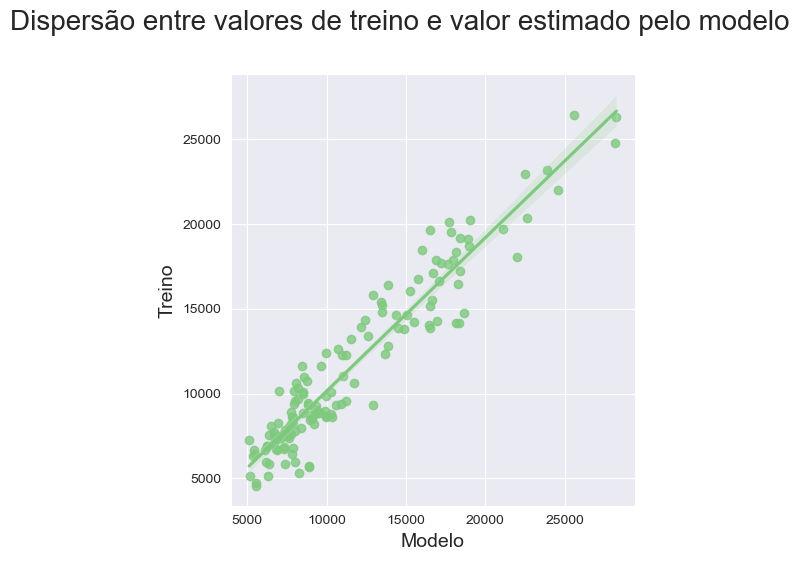

In [46]:
y_predict_train = modelo.predict(X_train[colunas_significativas[1:]])
df = pd.DataFrame({'treino':y_train,'modelo':y_predict_train})

ax = sns.lmplot(x='treino', y='modelo', data=df)
ax.fig.suptitle('Dispersão entre valores de treino e valor estimado pelo modelo', fontsize=20, y=1.1)
ax.set_axis_labels("Modelo", 'Treino', fontsize =14)
ax;

## 6.8 Validação Cruzada

In [47]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.base import clone

# Vamos supor que você tem suas features (X) e os targets (y)
# X é uma matriz de formato (n_samples, n_features)
# y é um vetor de formato (n_samples,)

# Defina o número de folds para a validação cruzada (por exemplo, 5 folds)
num_folds = 5

# Crie uma instância da classe KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Agora vamos fazer a validação cruzada
for train_index, test_index in kf.split(X):
    # Divide os dados em conjuntos de treinamento e teste para cada fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Clone o modelo para ter uma cópia independente para cada fold
    modelo_clone = clone(modelo)

    # Treine o modelo com os dados de treinamento do fold atual
    modelo_clone.fit(X_train, y_train)

    # Avalie o desempenho do modelo nos dados de teste do fold atual
    score = modelo_clone.score(X_test, y_test)
    print("R² Score:", score)


R² Score: 0.7869747144675552
R² Score: 0.8653336877871716
R² Score: 0.7628422168428368
R² Score: 0.7069800773709407
R² Score: 0.7306812592261684
